In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

Some pandas visualization practices

# Group boroughs by level

In [24]:
#Zhuoru Lin
#Convert output to df
f = open('../crime-data-process/results/borough_level.out','rb')
lines= f.read().strip().decode('utf-8').split('\n')
f.close()
pairs = [line.split('\t') for line in lines]
keys = [pair[0].split(',') for pair in pairs]
values = [int(pair[1]) for pair in pairs]
df = pd.DataFrame([[key[0],key[1],values[i]] for i,key in enumerate(keys)],\
                  columns=['area','type','count'])
df = df.sort_values(by=['area','type'])
df = df.pivot(index='area',columns='type',values='count')

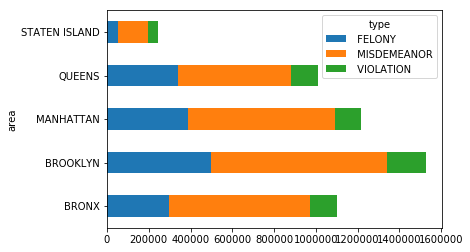

In [25]:
df.plot.barh(stacked=True)
plt.xlabel
plt.show()

# Group levels by year

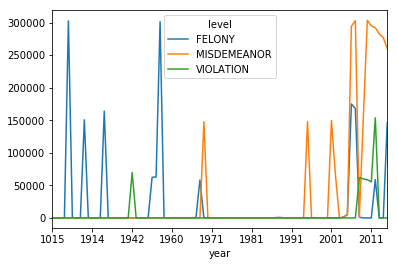

In [77]:
f = open('../crime-data-process/results/level_year.out','rb')
lines= f.read().strip().decode('utf-8').split('\n')
f.close()
pairs = [line.split('\t') for line in lines]
keys = [pair[0].split(' ') for pair in pairs]
#Add line to remove uncompleted keys
keys = [key for key in keys if len(key)==2]
values = [int(pair[1]) for pair in pairs]
df = pd.DataFrame([[key[0],key[1],values[i]] for i,key in enumerate(keys)],\
                  columns=['level','year','count']).sort_values(by=['year','level'])
#comment out .fillna(0) if do not want to keep the original NaN
df = df.pivot(index='year',columns='level',values='count').fillna(0)
df.plot()
plt.savefig('level_year')
plt.show()

## Problem

In [41]:
#Missing year for some keys
pd.DataFrame(pairs).loc[189]

0    FELONY
1       220
Name: 189, dtype: object

In [48]:
#abnormal high values

# Census data plot

In [19]:
f = open('../crime-data-process/results/census/population_crime_2010.out','r')
lines = f.read()

In [25]:
lines = lines.strip().split('\n')

In [28]:
pairs = [line.split('\t') for line in lines]

In [46]:
index = [pair[0] for pair in pairs]
values = [pair[1].split(',') for pair in pairs]
value1 = [int(value[0]) for value in values]
value2 = [int(value[1]) for value in values]

In [47]:
df_2plot = pd.DataFrame(index=index,columns=['population','crime'])

In [48]:
df_2plot['population'] = value1
df_2plot['crime'] = value2

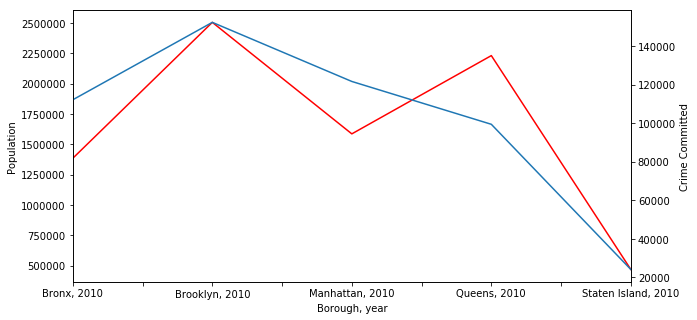

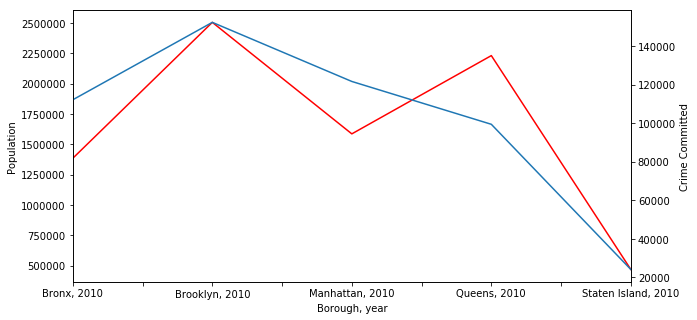

In [75]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
figure = ax1.get_figure()
figure.set_size_inches((10,5))
df_2plot.population.plot(color='r',ax=ax1)
df_2plot.crime.plot(ax=ax2)
ax1.set_xlabel('Borough, year')
ax1.set_ylabel('Population')
ax2.set_ylabel('Crime Committed')
plt.savefig('census_plot.png')
plt.show()